In [1]:
import numpy as np
import pandas as pd

In [2]:
d1=pd.DataFrame(pd.read_csv("./files/Accident.csv"))
d1.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often employing statistical graphics and other data visualization methods. The primary goal of EDA is to gain insight into the data and its underlying structure, rather than to confirm or refute specific hypotheses. It involves examining the data for patterns, trends, outliers, and other interesting features.

Key components of exploratory data analysis typically include:

Summary Statistics: Calculating basic statistical measures such as mean, median, mode, standard deviation, range, etc., to understand the central tendency and spread of the data.

Data Visualization: Creating visual representations of the data using plots, charts, histograms, scatter plots, box plots, etc., to explore relationships, distributions, and patterns within the data.

Identification of Outliers: Identifying data points that significantly deviate from the rest of the dataset, which might require further investigation.

Data Cleaning: Addressing missing values, inconsistencies, and errors in the dataset to ensure the quality and reliability of the analysis.

Feature Engineering: Creating new variables or transforming existing ones to better represent the underlying patterns in the data.

Dimensionality Reduction: Techniques like principal component analysis (PCA) or t-distributed stochastic neighbor embedding (t-SNE) can be used to reduce the dimensionality of the data while preserving its important features.

Pattern Discovery: Exploring relationships and correlations between variables to uncover patterns or trends that may provide insights into the data.

In [3]:
null_columns = d1.columns[d1.isnull().any()]
for column in null_columns:
    print(column)

Location_Easting_OSGR
Longitude
Time
Junction_Control
Pedestrian_Crossing-Human_Control
Pedestrian_Crossing-Physical_Facilities
Special_Conditions_at_Site
Carriageway_Hazards
LSOA_of_Accident_Location


In [4]:
d2=d1[["Location_Easting_OSGR",         
"Longitude",
"Time",
"Junction_Control",
"Pedestrian_Crossing-Human_Control",
"Pedestrian_Crossing-Physical_Facilities",
"Special_Conditions_at_Site",
"Carriageway_Hazards",
"LSOA_of_Accident_Location"
]]

In [5]:
d2.dtypes

Location_Easting_OSGR                      float64
Longitude                                  float64
Time                                        object
Junction_Control                            object
Pedestrian_Crossing-Human_Control           object
Pedestrian_Crossing-Physical_Facilities     object
Special_Conditions_at_Site                  object
Carriageway_Hazards                         object
LSOA_of_Accident_Location                   object
dtype: object

In [6]:
d1.dtypes

Unnamed: 0                                       int64
Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limi

**Unnamed 0 is extra column for index which is not necessary so we will drop the column**

In [7]:
d1=d1.drop(columns=['Unnamed: 0'])

In [8]:
d2[["Special_Conditions_at_Site","Carriageway_Hazards"]].notnull().sum()

Special_Conditions_at_Site    36582
Carriageway_Hazards           27250
dtype: int64

In [9]:
for column in d2.columns:
    # Filter out rows where the column is not null
    not_null_values = d2[d2["Special_Conditions_at_Site"].notnull()]["Special_Conditions_at_Site"]
    # Print the column name and its not null values
    print(f"Column: {column}")
    print(not_null_values)

Column: Location_Easting_OSGR
5                                             Ol or diesel
47                                               Roadworks
97                    Auto traffic signal partly defective
203                                              Roadworks
465                                              Roadworks
                                ...                       
1504090                             Road surface defective
1504091                                                Mud
1504095                            Auto traffic singal out
1504117    Permanent sign or marking defective or obscured
1504132                                          Roadworks
Name: Special_Conditions_at_Site, Length: 36582, dtype: object
Column: Longitude
5                                             Ol or diesel
47                                               Roadworks
97                    Auto traffic signal partly defective
203                                              Roadworks
465 

Questions to ask about this data are,

- What is the number of casualties on each day of the week?
- On each day of the week, what is the maximum and minimum speed limit on the roads the accidents happened?
- What is the importance of Light and Weather conditions in predicting accident severity?
- What does your intuition say and what does the data portray?
- To predict the severity of the accidents.

In [10]:
d1['Date']=pd.to_datetime(d1['Date'], format='%d/%m/%Y')

In [11]:
d1['Day_of_Week'] = d1['Date'].dt.day_name()

# Group the data by day of the week and sum the casualties for each group
casualties_by_day = d1.groupby('Day_of_Week')['Number_of_Casualties'].sum()

# Print the result
print(casualties_by_day)

Day_of_Week
Friday       331934
Monday       284043
Saturday     285261
Sunday       239532
Thursday     299044
Tuesday      294476
Wednesday    297756
Name: Number_of_Casualties, dtype: int64


In [12]:

d1[['Location_Easting_OSGR','Longitude']].isnull().sum()

Location_Easting_OSGR    101
Longitude                101
dtype: int64

In [13]:
d1[['Location_Easting_OSGR','Longitude']]

,Location_Easting_OSGR,Longitude
0,525680.0,-0.191170
1,524170.0,-0.211708
2,524520.0,-0.206458
3,526900.0,-0.173862
4,528060.0,-0.156618
...,...,...
1504145,310037.0,-3.417278
1504146,321509.0,-3.230255
1504147,321337.0,-3.230826
1504148,323869.0,-3.191397


In [14]:
d1['Location_Easting_OSGR'].fillna(d1['Location_Easting_OSGR'].median(),inplace=True)

In [15]:
d1['Longitude'].fillna(d1['Longitude'].median(),inplace=True)

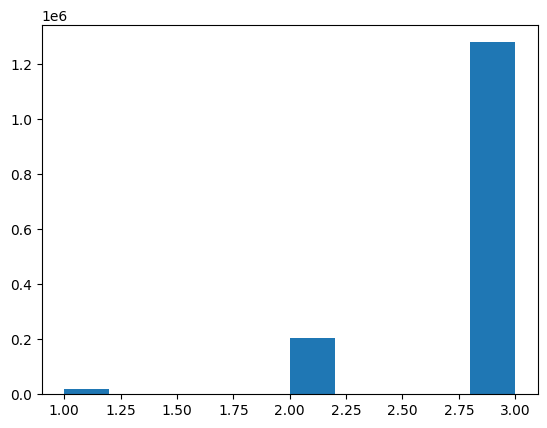

In [16]:
import matplotlib.pyplot as plt

x=d1['Accident_Severity']
plt.hist(x)
plt.show()

In [17]:
numerical_columns = d1.select_dtypes(include=['number']).columns

# Print the numerical columns
print(numerical_columns)

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Local_Authority_(District)', '1st_Road_Class',
       '1st_Road_Number', 'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
       'Urban_or_Rural_Area', 'Year'],
      dtype='object')


In [18]:
d3=d1[['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Local_Authority_(District)', '1st_Road_Class',
       '1st_Road_Number', 'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
       'Urban_or_Rural_Area', 'Year']]

In [19]:
d3.isnull().sum()

Location_Easting_OSGR         0
Location_Northing_OSGR        0
Longitude                     0
Latitude                      0
Police_Force                  0
Accident_Severity             0
Number_of_Vehicles            0
Number_of_Casualties          0
Local_Authority_(District)    0
1st_Road_Class                0
1st_Road_Number               0
Speed_limit                   0
2nd_Road_Class                0
2nd_Road_Number               0
Urban_or_Rural_Area           0
Year                          0
dtype: int64

In [20]:
d3.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06
mean,4.396214e+05,3.001382e+05,-1.436623e+00,5.258587e+01,3.020536e+01,2.838190e+00,1.831606e+00,1.350960e+00,3.476149e+02,4.087999e+00,1.009919e+03,3.900540e+01,2.675084e+00,3.815684e+02,1.353871e+00,2.009370e+03
std,9.511297e+04,1.610218e+05,1.398031e+00,1.512524e+00,2.551603e+01,4.018423e-01,7.147586e-01,8.253345e-01,2.594292e+02,1.428936e+00,1.823518e+03,1.413993e+01,3.205539e+00,1.302555e+03,4.783534e-01,3.013497e+00
min,6.495000e+04,0.000000e+00,-7.516225e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+01,-1.000000e+00,-1.000000e+00,1.000000e+00,2.005000e+03
25%,3.750682e+05,1.782600e+05,-2.373787e+00,5.149009e+01,6.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.100000e+02,3.000000e+00,0.000000e+00,3.000000e+01,-1.000000e+00,0.000000e+00,1.000000e+00,2.006000e+03
50%,4.399600e+05,2.688000e+05,-1.403714e+00,5.230888e+01,3.000000e+01,3.000000e+00,2.000000e+00,1.000000e+00,3.220000e+02,4.000000e+00,1.290000e+02,3.000000e+01,3.000000e+00,0.000000e+00,1.000000e+00,2.010000e+03
75%,5.230500e+05,3.981500e+05,-2.215410e-01,5.347855e+01,4.500000e+01,3.000000e+00,2.000000e+00,1.000000e+00,5.180000e+02,6.000000e+00,7.250000e+02,5.000000e+01,6.000000e+00,0.000000e+00,2.000000e+00,2.012000e+03
max,6.553700e+05,1.208800e+06,1.759398e+00,6.075754e+01,9.800000e+01,3.000000e+00,6.700000e+01,9.300000e+01,9.410000e+02,6.000000e+00,9.999000e+03,7.000000e+01,6.000000e+00,9.999000e+03,3.000000e+00,2.014000e+03


In [21]:
d3

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
0,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,12,3,3218,30,-1,0,1,2005
1,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,12,4,450,30,5,0,1,2005
2,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,12,5,0,30,-1,0,1,2005
3,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,12,3,3220,30,-1,0,1,2005
4,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,12,6,0,30,-1,0,1,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,917,2,74,70,-1,0,2,2014
1504146,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,917,2,74,70,-1,0,2,2014
1504147,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,917,4,721,40,-1,0,2,2014
1504148,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,917,3,75,60,5,43,2,2014


In [24]:
d3['Urban_or_Rural_Area']

0          1
1          1
2          1
3          1
4          1
          ..
1504145    2
1504146    2
1504147    2
1504148    2
1504149    2
Name: Urban_or_Rural_Area, Length: 1504150, dtype: int64

In [25]:
corr_matrix = d3.corr()
corr_matrix

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
Location_Easting_OSGR,1.000000,-0.420164,0.999359,-0.404637,-0.356438,0.013465,0.017152,-0.040779,-0.380418,-0.060286,-0.084675,-0.063705,0.044523,-0.000128,-0.095903,0.038401
Location_Northing_OSGR,-0.420164,1.000000,-0.430674,0.962771,0.167844,-0.031392,-0.041357,0.032092,0.121125,0.035438,0.043899,0.047655,-0.030743,0.017022,0.053073,-0.013490
Longitude,0.999359,-0.430674,1.000000,-0.414661,-0.369716,0.013946,0.018442,-0.039500,-0.390500,-0.058798,-0.082416,-0.062820,0.045048,0.001401,-0.094237,0.038054
Latitude,-0.404637,0.962771,-0.414661,1.000000,0.156826,-0.030076,-0.039285,0.030983,0.112444,0.033848,0.043064,0.044220,-0.028189,0.017234,0.042961,-0.010155
Police_Force,-0.356438,0.167844,-0.369716,0.156826,1.000000,-0.031712,-0.015491,0.007073,0.981975,0.044895,-0.000199,0.197990,-0.119040,-0.018276,0.240858,-0.033599
Accident_Severity,0.013465,-0.031392,0.013946,-0.030076,-0.031712,1.000000,0.075976,-0.083544,-0.031995,0.012754,-0.004072,-0.079108,0.064321,0.026128,-0.082169,-0.005907
Number_of_Vehicles,0.017152,-0.041357,0.018442,-0.039285,-0.015491,0.075976,1.000000,0.237349,-0.010506,-0.142306,-0.008871,0.084785,0.068607,0.024320,0.041081,-0.007846
Number_of_Casualties,-0.040779,0.032092,-0.039500,0.030983,0.007073,-0.083544,0.237349,1.000000,0.014316,-0.082984,0.007750,0.139551,-0.029212,0.001997,0.115974,-0.015140
Local_Authority_(District),-0.380418,0.121125,-0.390500,0.112444,0.981975,-0.031995,-0.010506,0.014316,1.000000,0.055861,0.010440,0.204926,-0.119100,-0.016618,0.253824,-0.037073
1st_Road_Class,-0.060286,0.035438,-0.058798,0.033848,0.044895,0.012754,-0.142306,-0.082984,0.055861,1.000000,-0.089215,-0.389887,0.103458,-0.033920,-0.226737,-0.010929


<Axes: >

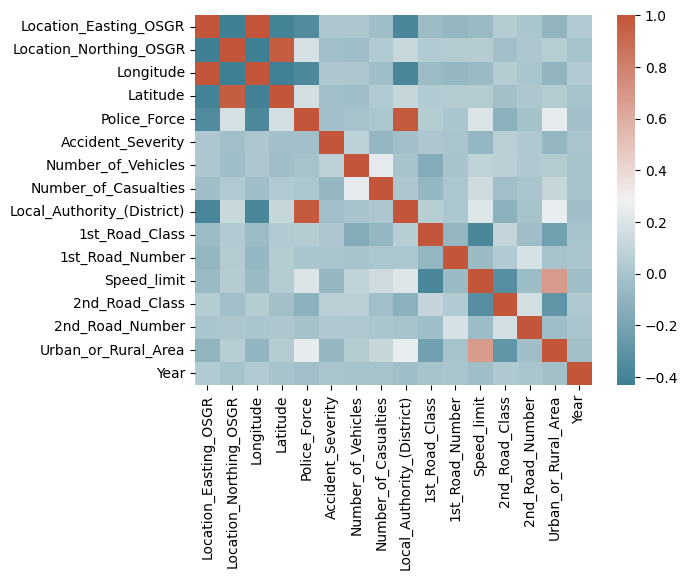

In [26]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr_matrix,cmap=cmap)

Here , orange color showcases the most positive correlation , and blue shows negative correlations so ,
- Positve correlation
   1. Local authority(district) with police force
   2. Location northing is highly correlated with latitude 
   3. Location easting is highly correlated with longitude

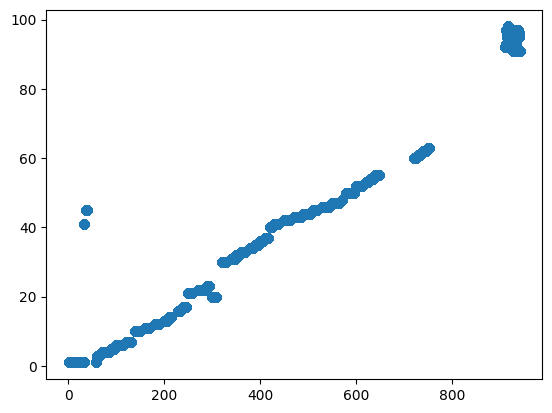

In [27]:
plt.scatter(d1['Local_Authority_(District)'],d1['Police_Force'])

In [28]:
# On each day of the week, what is the maximum and minimum speed limit on the roads the accidents
# - happened?
d1['Speed_limit']
d1['Accident_Index']

0          200501BS00001
1          200501BS00002
2          200501BS00003
3          200501BS00004
4          200501BS00005
               ...      
1504145         2.01E+12
1504146         2.01E+12
1504147         2.01E+12
1504148         2.01E+12
1504149         2.01E+12
Name: Accident_Index, Length: 1504150, dtype: object

In [29]:
# Convert 'Date' column to datetime format
d1['Date'] = pd.to_datetime(d1['Date'])

# Extract the day of the week from the 'Date' column
d1['Day_of_Week'] = d1['Date'].dt.day_name()

# Group the data by day of the week and calculate the maximum and minimum speed limits
speed_limits_summary = d1.groupby('Day_of_Week')['Speed_limit'].agg(['max', 'min'])

# Print the result
print("Maximum and Minimum Speed Limits by Day of the Week:")
print(speed_limits_summary)

Maximum and Minimum Speed Limits by Day of the Week:
             max  min
Day_of_Week          
Friday        70   10
Monday        70   10
Saturday      70   10
Sunday        70   10
Thursday      70   10
Tuesday       70   10
Wednesday     70   20


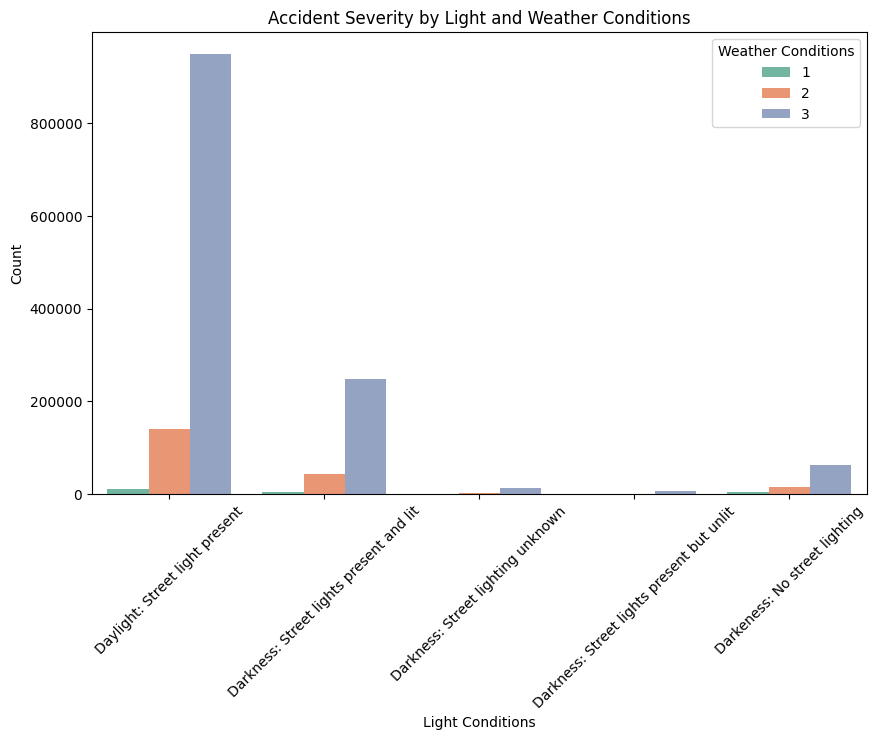

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Light_Conditions', data=d1, palette='Set2',hue='Accident_Severity')
plt.title('Accident Severity by Light and Weather Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Count')
plt.legend(title='Weather Conditions')
plt.xticks(rotation=45)
plt.show()

Now we will count casualities with accident survey

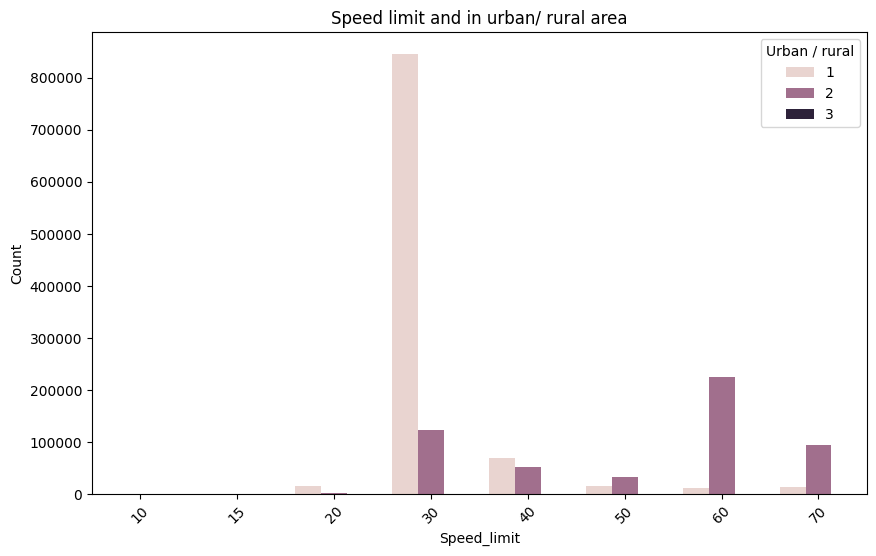

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=d3,x='Speed_limit',hue='Urban_or_Rural_Area')
plt.title('Speed limit and in urban/ rural area')
plt.xlabel('Speed_limit')
plt.ylabel('Count')
plt.legend(title='Urban / rural')
plt.xticks(rotation=45)
plt.show()

In [32]:
d3['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
1    972007
2    532011
3       132
Name: count, dtype: int64

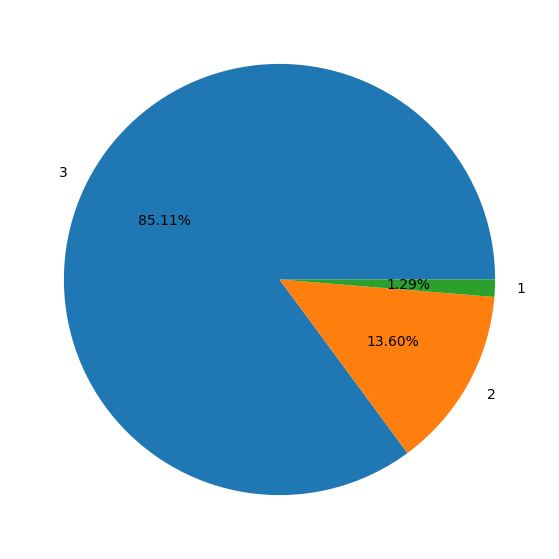

In [33]:
plt.figure(figsize=(10,7))
plt.pie(x=d1['Accident_Severity'].value_counts().values,
        labels=d1['Accident_Severity'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

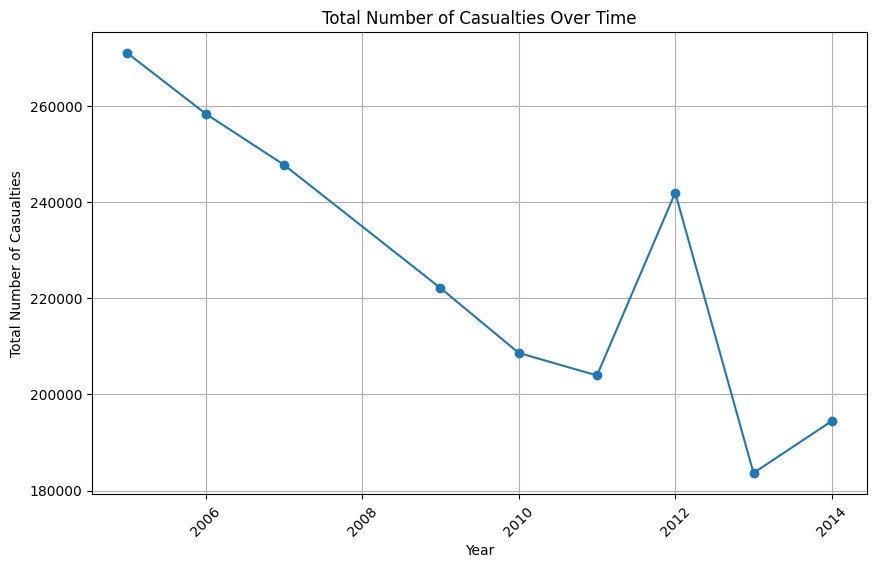

In [34]:
casualties_by_year = d1.groupby('Year')['Number_of_Casualties'].sum()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(casualties_by_year.index, casualties_by_year.values, marker='o')
plt.title('Total Number of Casualties Over Time')
plt.xlabel('Year')
plt.ylabel('Total Number of Casualties')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

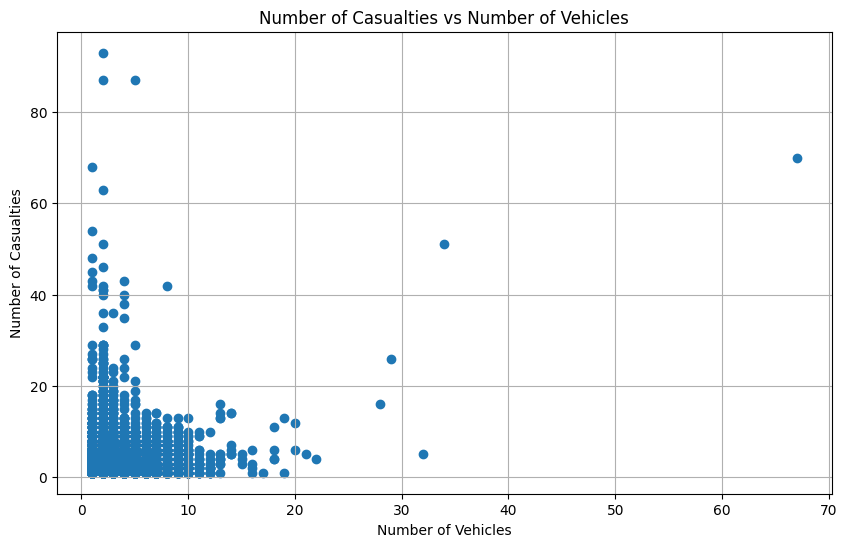

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(d1['Number_of_Vehicles'], d1['Number_of_Casualties'])
plt.title('Number of Casualties vs Number of Vehicles')
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Casualties')
plt.grid(True)
plt.show()

Step 4: Feature Relationships
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons

In [36]:
# ax = sns.scatterplot(x='Speed_mph',
#                 y='Height_ft',
#                 hue='Year_Introduced',
#                 data=df)
# ax.set_title('Coaster Speed vs. Height')
# plt.show()